In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.


In [64]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df.head()


,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
   equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?


In [65]:
model = linear_model.LinearRegression()
X = np.array(df['Ground Temperature']).reshape(-1, 1)
y = df['Chirps/Second']
model.fit(X, y)
equation_ = f'y = {model.coef_[0]:.2f} x + {model.intercept_:.2f}'
def equation_func(x): return (model.coef_[0]*x) + model.intercept_


equation_


'y = 0.20 x + 0.46'

Text(60, 200, 'y = 0.20 x + 0.46')

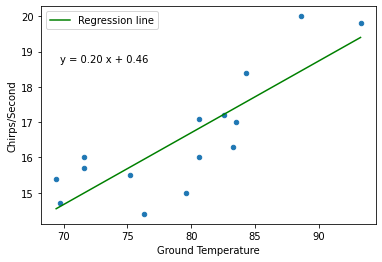

In [66]:
ax = df.plot(kind='scatter', x='Ground Temperature', y='Chirps/Second')
x1, x2 = df['Ground Temperature'].min(), df['Ground Temperature'].max()
pd.DataFrame([equation_func(x1), equation_func(x2)], index=[x1, x2])\
    .plot(kind='line', ax=ax, color='green')
ax.legend(['Regression line'])
ax.annotate(equation_, (60, 200), xycoords='figure points')


In [67]:
score = model.score(X, y)
freq_at_95 = equation_func(95)
def equation_func_x(y): return (y-model.intercept_) / model.coef_[0]


temp_at_18hz = equation_func_x(18)
print(
    f'''
    model_score: {score:.3f}
    frequency at 95F: {freq_at_95:.2f}hz
    temperature at 18hz: {temp_at_18hz:.2f}F
    '''
)



    model_score: 0.692
    frequency at 95F: 19.74hz
    temperature at 18hz: 86.41F
    


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
   equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)


In [68]:
df = pd.read_fwf("brain_body.txt")
df.head()


,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [69]:
model = linear_model.LinearRegression()
X = np.array(df['Brain']).reshape(-1, 1)
y = df['Body']
model.fit(X, y)
equation_ = f'y = {model.coef_[0]:.2f} x + {model.intercept_:.2f}'
def equation_func(x): return (model.coef_[0]*x) + model.intercept_


equation_


'y = 0.97 x + 91.00'

Text(60, 200, 'y = 0.97 x + 91.00')

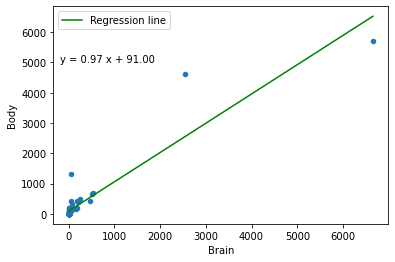

In [70]:
ax = df.plot(kind='scatter', x='Brain', y='Body')
x1, x2 = df['Brain'].min(), df['Brain'].max()
pd.DataFrame([equation_func(x1), equation_func(x2)], index=[x1, x2])\
    .plot(kind='line', ax=ax, color='green')
ax.legend(['Regression line'])
ax.annotate(equation_, (60, 200), xycoords='figure points')


In [71]:
score = model.score(X, y)
print(f'model_score: {score:.3f}')


model_score: 0.873


## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.


In [72]:
df = pd.read_fwf("salary.txt", header=None,
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()


,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [73]:
model = linear_model.LinearRegression()
X = df.drop('Salary', axis=1)
y = df['Salary']
model.fit(X, y)


def coeffs(
    arr): return ' + '.join([f'{x:.2f} x{i}' for i, x in enumerate(arr)])


equation_ = f'y = {coeffs(model.coef_)} + {model.intercept_:.2f}'
equation_


'y = 1241.79 x0 + 5586.18 x1 + 482.86 x2 + -1331.64 x3 + -128.79 x4 + 11410.15'

In [74]:
df_corr = df.corr()[['Salary']]
df_corr.reset_index(inplace=True)
df_corr


,index,Salary
0,Sex,-0.252782
1,Rank,0.867488
2,Year,0.700669
3,Degree,-0.069726
4,YSdeg,0.674854
5,Salary,1.000000


In [75]:
best_features = df_corr[df_corr['Salary'].abs() > 0.2]['index'].to_list()
best_features.remove('Salary')
best_features


['Sex', 'Rank', 'Year', 'YSdeg']

In [76]:
X = df.drop('Salary', axis=1)
y = df['Salary']
model.fit(X, y)
score1 = model.score(X, y)
X = df[best_features]
y = df['Salary']
model.fit(X, y)
score2 = model.score(X, y)
X = np.array(df['Rank']).reshape(-1, 1)
y = df['Salary']
model.fit(X, y)
score3 = model.score(X, y)
print(score1, score2, score3)
print('The R² will never be lower for equations with more parameters')


0.8547180674410969 0.8490366192262851 0.7525360539274633
The R² will never be lower for equations with more parameters


#### Since 'sex' has correlation magnitude above 0.2 we can consider it to be a factor having meaningful contribution to the salary
